# Diabetes Health Prediction

**Data Source:** [kaggle](https://www.kaggle.com/alexteboul/diabetes-health-indicators-dataset)

**Members**:
- David Mairena
- Fernando Sirias

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [111]:
df = pd.read_csv("data\diabetes.csv")
df.shape

(253680, 22)

In [112]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [113]:
df.Diabetes_binary.value_counts(normalize=True)

0.0    0.860667
1.0    0.139333
Name: Diabetes_binary, dtype: float64

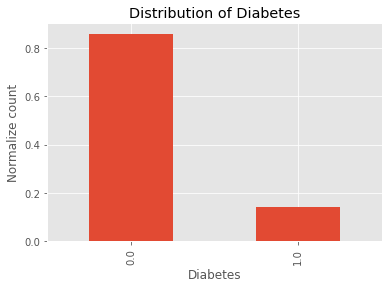

In [114]:
df.Diabetes_binary.value_counts(normalize=True).plot(kind='bar')
plt.title("Distribution of Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Normalize count")
plt.show()

In [115]:
df.Sex.value_counts(normalize=True)

0.0    0.559658
1.0    0.440342
Name: Sex, dtype: float64

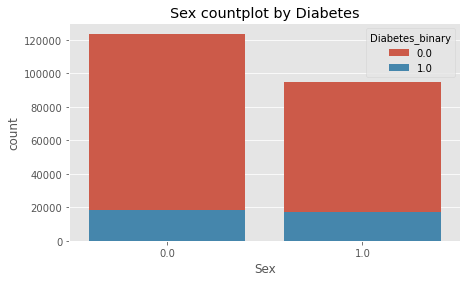

In [116]:
plt.figure(figsize=(7, 4))
sns.countplot(data = df, x = 'Sex', hue='Diabetes_binary', dodge=False)
plt.title("Sex countplot by Diabetes")
plt.show()

## Data Cleaning

In [117]:
print("Total N/A:", df.isnull().sum().sum())

Total N/A: 0


In [118]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

## Exploratory Data Analysis

In [119]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [120]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


---
`Age` columns as a range of values between 1 and 13, this is because each value correspond to a range of 5 years:
- **1:** 18-24.
- **2:** 25-29.
- **3:** 30-34.
- ...
- **13:** 80 or older.

So in the next plot we can see the ranges of ages with most cases of diabetes, people with an age between **65-69** (10) are more likely to have diabetes.

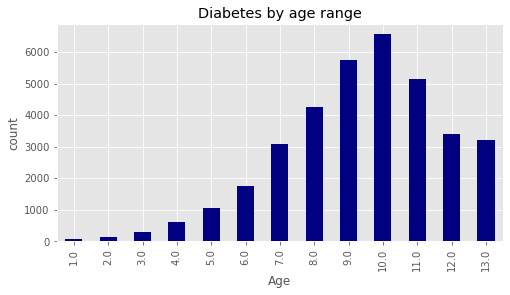

In [121]:
plt.figure(figsize=(8,4))
temp = df[df.Diabetes_binary == 1].groupby('Age').Diabetes_binary.count()
temp.plot(kind="bar", color='navy')
plt.title("Diabetes by age range")
plt.ylabel("count")
plt.show()

---
In the next plot we can see that if you have high cholesterol levels you are basically **twice** as likely to have diabetes as people without high cholesterol.

The second plot you us that the people that checks their cholesterol level in the past 5 years have the most **negatives** diabetes cases, this can be due the people that didn't check their cholesterol dont receive an alert to avoid diabetes.

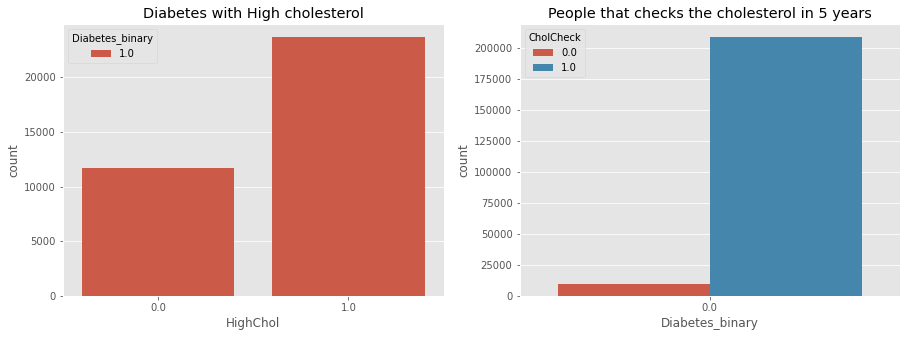

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data = df[df.Diabetes_binary == 1], x = 'HighChol', hue = 'Diabetes_binary', ax=axes[0])
axes[0].set_title("Diabetes with High cholesterol")
sns.countplot(data = df[df.Diabetes_binary == 0], x = 'Diabetes_binary', hue = 'CholCheck', ax=axes[1])
axes[1].set_title("People that checks the cholesterol in 5 years")
plt.show()

---
The following plot shows that people who do physical activities are **less likely to have diabetes.**

Since exercising helps improve cholesterol levels, blood pressure and body weight, also one of the most important factors is that it helps improve resistance to insulin.

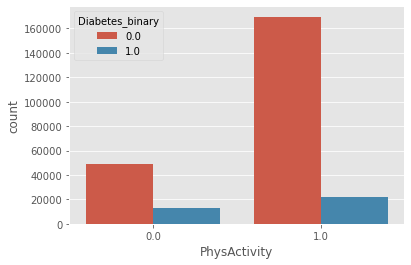

In [124]:
sns.countplot(data = df, x = 'PhysActivity', hue = 'Diabetes_binary')
plt.show()

---
The following graph shows us that the column `BMI` is not a factor related to diabetes, since it can be seen that both categories of the column `diabetes` (0, 1) have relatively the same **distribution**.


<AxesSubplot:xlabel='Diabetes_binary', ylabel='BMI'>

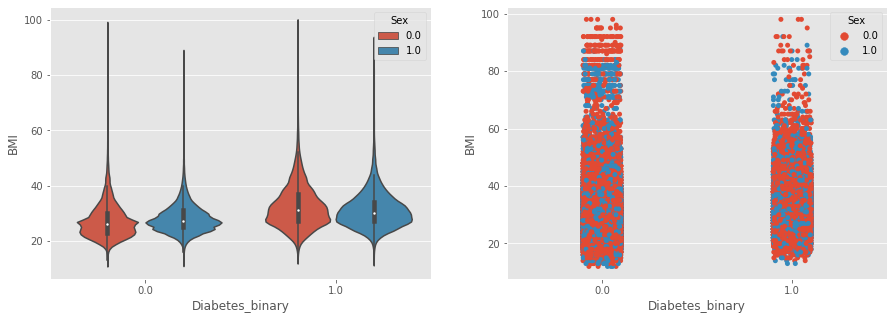

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot(data = df, x = 'Diabetes_binary', y = 'BMI',hue='Sex', ax=axes[0])
sns.stripplot(data = df, x = 'Diabetes_binary', y = 'BMI', hue='Sex', ax=axes[1])

---
Next we created a plot that shows the amount of people that consume fruits and vegetables. As we can see, there is more risk of having Diabetes if people doesn't eat vegetables or fruits.   

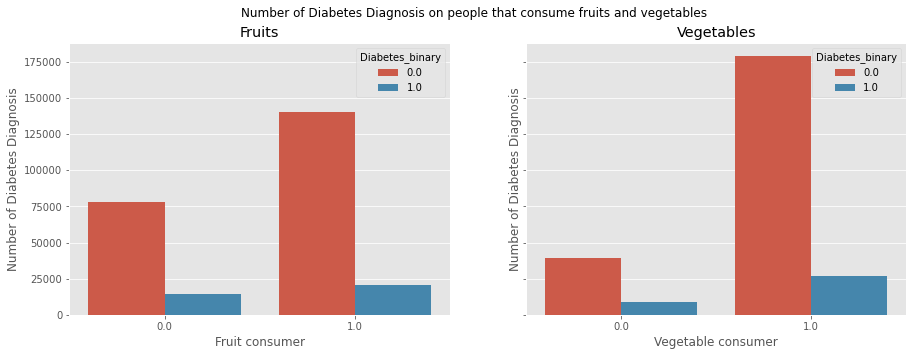

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Number of Diabetes Diagnosis on people that consume fruits and vegetables')

# fruits
sns.countplot(data = df, x = 'Fruits', hue = 'Diabetes_binary', ax=axes[0])
axes[0].set_title("Fruits")
axes[0].set_xlabel("Fruit consumer")
axes[0].set_ylabel("Number of Diabetes Diagnosis")

# veggie
sns.countplot(data = df, x = 'Veggies', hue = 'Diabetes_binary', ax=axes[1])
axes[1].set_title("Vegetables")
axes[1].set_xlabel("Vegetable consumer")
axes[1].set_ylabel("Number of Diabetes Diagnosis")

plt.show()

---
Also we have some insights on the Diabetes diagnosis for the people that consumes Alcohol or are Smokers.
As we could see in following plot, it seems to not be correlated with Diabetes because of the minimun differences in the positive and negative diagnosis in both subplots. 

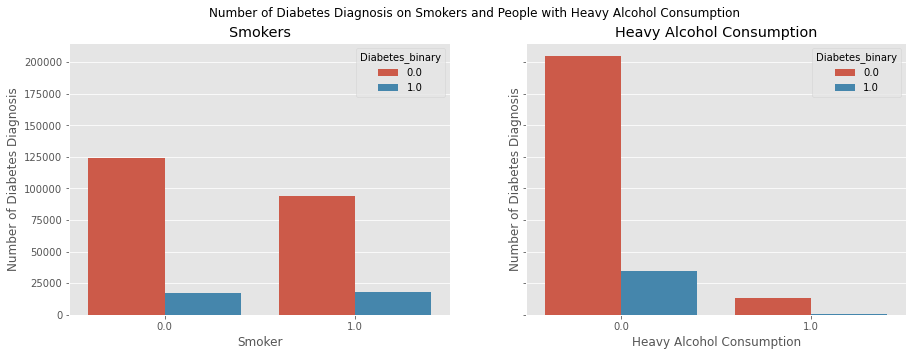

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Number of Diabetes Diagnosis on Smokers and People with Heavy Alcohol Consumption')

# fruits
sns.countplot(data = df, x = 'Smoker', hue = 'Diabetes_binary', ax=axes[0])
axes[0].set_title("Smokers")
axes[0].set_ylabel("Number of Diabetes Diagnosis")

# veggie
sns.countplot(data = df, x = 'HvyAlcoholConsump', hue = 'Diabetes_binary', ax=axes[1])
axes[1].set_title("Heavy Alcohol Consumption")
axes[1].set_xlabel("Heavy Alcohol Consumption")
axes[1].set_ylabel("Number of Diabetes Diagnosis")
plt.show()